In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
df_TP = pd.read_csv('../tests/06/in_Central_out_TP.csv', delimiter=';')
df_TP['diff'] = df_TP['complete_time'] - df_TP['in_time']
df_TP['diff_assign'] = df_TP['assign_time'] - df_TP['in_time']

df_TPTS = pd.read_csv('../tests/06/in_Central_out_TPTS.csv', delimiter=';')
df_TPTS['diff'] = df_TPTS['complete_time'] - df_TPTS['in_time']
df_TPTS['diff_assign'] = df_TPTS['assign_time'] - df_TPTS['in_time']

df_central = pd.read_csv('../tests/06/in2_Central.csv', delimiter=';')
df_central['diff'] = df_central['complete_time'] - df_central['in_time']
df_central['diff_assign'] = df_central['assign_time'] - df_central['in_time']
df_central

,task_id,start,end,in_time,assign_time,complete_time,car_id,is_VIP,diff,diff_assign
0,2,"(1, 11)","(5, 9)",0,0,6,14,False,6,0
1,12,"(7, 11)","(3, 13)",0,0,6,21,False,6,0
2,3,"(13, 3)","(7, 6)",0,0,9,24,False,9,0
3,14,"(13, 10)","(7, 7)",0,1,10,27,False,10,1
4,16,"(3, 1)","(4, 4)",0,7,11,13,False,11,7
...,...,...,...,...,...,...,...,...,...,...
902,909,"(10, 11)","(1, 12)",876,878,894,18,False,18,2
903,900,"(10, 10)","(9, 9)",869,883,895,24,False,26,14
904,904,"(4, 6)","(14, 1)",872,873,895,13,False,23,1
905,902,"(2, 13)","(9, 5)",869,881,899,10,False,30,12


Text(0.5, 0, 'Doba úkolu v systému')

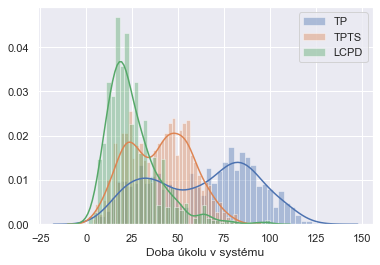

In [4]:
fig, ax = plt.subplots()

ax3 = sns.distplot(df_TP['diff'], bins=40, label = 'TP')
#ax.axvline(df_TP['diff'].median(), color = 'blue')

ax2 = sns.distplot(df_TPTS['diff'], bins=40, label = 'TPTS')
#ax.axvline(df_TPTS['diff'].median(), color = 'orange')

ax1 = sns.distplot(df_central['diff'], bins=40, label = 'LCPD')
#ax.axvline(df_central['diff'].median(), color = 'green')

plt.legend()
ax.set_xlabel('Doba úkolu v systému')
#ax.get_figure().savefig(f't03_all.png', dpi=200)

Text(0.5, 0, 'Doba do vyzvenutí úkolu')

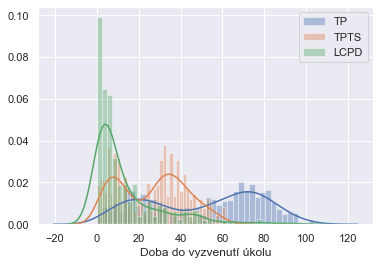

In [13]:
fig, ax = plt.subplots()
ax3 = sns.distplot(df_TP['diff_assign'], bins=40, label = 'TP')
ax2 = sns.distplot(df_TPTS['diff_assign'], bins=40, label = 'TPTS')
ax1 = sns.distplot(df_central['diff_assign'], bins=40, label = 'LCPD')
plt.legend()
ax.set_xlabel('Doba do vyzvenutí úkolu')

#ax.get_figure().savefig(f't03_pickup.png', dpi=200)

In [28]:
#ax= df_central['diff_assign'].hist(bins=40)
count, division = np.histogram(df_TPTS['diff_assign'],bins=40)
display(count)
display(division)

array([27, 31, 22, 52, 21, 49, 45, 16, 32, 13, 21,  9, 16, 15,  8, 28,  9,
       24, 27, 44, 54, 19, 49, 19, 44, 23, 34, 24, 17, 21, 10, 17, 11, 18,
       14,  3,  6,  2, 12,  1], dtype=int32)

array([ 0.   ,  1.575,  3.15 ,  4.725,  6.3  ,  7.875,  9.45 , 11.025,
       12.6  , 14.175, 15.75 , 17.325, 18.9  , 20.475, 22.05 , 23.625,
       25.2  , 26.775, 28.35 , 29.925, 31.5  , 33.075, 34.65 , 36.225,
       37.8  , 39.375, 40.95 , 42.525, 44.1  , 45.675, 47.25 , 48.825,
       50.4  , 51.975, 53.55 , 55.125, 56.7  , 58.275, 59.85 , 61.425,
       63.   ])

In [30]:
df_TP['diff_assign'].median()

56.0

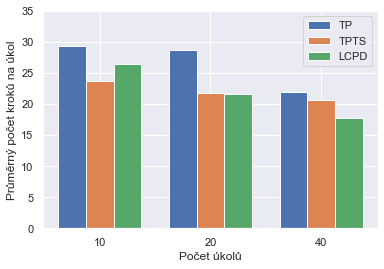

In [14]:
labels = [10, 20, 40]
TP = [6143/209, 11976/418, 11976/547]
TPTS = [5996/253, 11976/549, 11976/581]
LCPD = [8489/321, 11976/554, 11976/674]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, TP, width, label='TP')
rects2 = ax.bar(x , TPTS, width, label='TPTS')
rects3 = ax.bar(x + width, LCPD, width, label='LCPD')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Průměrný počet kroků na úkol')
ax.set_xlabel('Počet úkolů')
ax.set_xticks(x)
ax.yaxis.set_ticks(np.arange(0, 40, 5))
ax.set_xticklabels(labels)
ax.legend()
ax.get_figure().savefig(f't02_moves.png', dpi=1200)

In [7]:
agents = 20
tasks = 40
tp_data = pd.read_csv(f'../tests/05/TP_a{agents}_t{tasks}.csv', delimiter=';')
tp_data['diff'] = tp_data['complete_time'] - tp_data['in_time']
print(tp_data['diff'].mean())

tpts_data = pd.read_csv(f'../tests/05/TPTS_a{agents}_t{tasks}.csv', delimiter=';')
tpts_data['diff'] = tpts_data['complete_time'] - tpts_data['in_time']
print(tpts_data['diff'].mean())

central_data = pd.read_csv(f'../tests/05/Central_a{agents}_t{tasks}.csv', delimiter=';')
central_data['diff'] = central_data['complete_time'] - central_data['in_time']
print(central_data['diff'].mean())

40.9926873857404
38.6144578313253
33.04154302670623


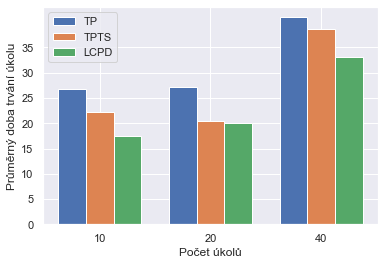

In [15]:
labels = [10, 20, 40]
TP = [26.870813397129186, 27.124401913875598, 40.9926873857404]
TPTS = [22.209486166007906, 20.451730418943534, 38.6144578313253]
LCPD = [17.404984423676012, 20.10649819494585, 33.04154302670623]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, TP, width, label='TP')
rects2 = ax.bar(x , TPTS, width, label='TPTS')
rects3 = ax.bar(x + width, LCPD, width, label='LCPD')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Průměrný doba trvání úkolu')
ax.set_xlabel('Počet úkolů')
ax.set_xticks(x)
ax.yaxis.set_ticks(np.arange(0, 40, 5))
ax.set_xticklabels(labels)
ax.legend()
ax.get_figure().savefig(f't02_times.png', dpi=1200)

In [13]:
tpts_data.describe()

,task_id,in_time,assign_time,complete_time,car_id,diff
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,291.096386,261.972461,286.657487,300.586919,19.462995,38.614458
std,168.030009,169.404411,170.690660,170.831995,5.753028,9.321429
min,1.000000,0.000000,0.000000,5.000000,10.000000,5.000000
25%,146.000000,114.000000,139.000000,154.000000,14.000000,33.000000
50%,291.000000,261.000000,287.000000,301.000000,19.000000,39.000000
75%,436.000000,409.000000,434.000000,448.000000,24.000000,44.000000
max,589.000000,564.000000,595.000000,598.000000,29.000000,65.000000
